# Tutorial: Conformal Prediction in Python with $\texttt{crepes}$

This notebook was developed in conjunction with a tutorial held by Henrik Boström on Sep. 11, 2024, at the 13th Symposium on Conformal and Probabilistic Prediction with Applications, at Politecnico Milano.

Part of the code has been adapted to incorporate changes made after the tutorial, which was based on crepes v. 0.7.0. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from crepes import __version__

print(f"crepes v. {__version__}")

np.random.seed(602211023)

crepes v. 0.7.1


# Conformal classifiers

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml(name="qsar-biodeg", parser="auto")

X = dataset.data.values.astype(float)
y = np.array(["NRB" if v == "1" else "RB" 
              for v in dataset.target])

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=1/4)

X_prop_train, X_cal, y_prop_train, y_cal = \
    train_test_split(X_train, y_train, test_size=1/3)

In [3]:
np.unique(y, return_counts=True)

(array(['NRB', 'RB'], dtype='<U3'), array([699, 356]))

In [4]:
print(dataset.DESCR)

**Author**: Kamel Mansouri, Tine Ringsted, Davide Ballabio  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation)  
**Please cite**: Mansouri, K., Ringsted, T., Ballabio, D., Todeschini, R., Consonni, V. (2013). Quantitative Structure - Activity Relationship models for ready biodegradability of chemicals. Journal of Chemical Information and Modeling, 53, 867-878 


QSAR biodegradation Data Set 

* Abstract: 

Data set containing values for 41 attributes (molecular descriptors) used to classify 1055 chemicals into 2 classes (ready and not ready biodegradable).


* Source:

Kamel Mansouri, Tine Ringsted, Davide Ballabio (davide.ballabio '@' unimib.it), Roberto Todeschini, Viviana Consonni, Milano Chemometrics and QSAR Research Group (http://michem.disat.unimib.it/chm/), UniversitÃ  degli Studi Milano â€“ Bicocca, Milano (Italy)


* Data Set Information:

The QSAR biodegradation dataset was built in the Milano Chemometrics and QSAR Research Group (UniversitÃ  deg

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, n_estimators=500)

rf.fit(X_prop_train, y_prop_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [6]:
rf.classes_

array(['NRB', 'RB'], dtype='<U3')

In [7]:
rf.predict_proba(X_cal)

array([[0.986, 0.014],
       [0.998, 0.002],
       [0.11 , 0.89 ],
       [0.952, 0.048],
       [0.97 , 0.03 ],
       [0.74 , 0.26 ],
       [0.62 , 0.38 ],
       [0.666, 0.334],
       [0.708, 0.292],
       [0.406, 0.594],
       [0.96 , 0.04 ],
       [0.672, 0.328],
       [0.95 , 0.05 ],
       [0.976, 0.024],
       [0.994, 0.006],
       [0.51 , 0.49 ],
       [0.104, 0.896],
       [0.018, 0.982],
       [0.726, 0.274],
       [0.954, 0.046],
       [0.518, 0.482],
       [0.082, 0.918],
       [0.842, 0.158],
       [0.396, 0.604],
       [0.328, 0.672],
       [0.682, 0.318],
       [0.976, 0.024],
       [0.274, 0.726],
       [0.992, 0.008],
       [0.87 , 0.13 ],
       [0.55 , 0.45 ],
       [0.132, 0.868],
       [0.582, 0.418],
       [0.93 , 0.07 ],
       [0.916, 0.084],
       [0.982, 0.018],
       [0.84 , 0.16 ],
       [0.636, 0.364],
       [0.922, 0.078],
       [0.82 , 0.18 ],
       [0.04 , 0.96 ],
       [0.988, 0.012],
       [0.996, 0.004],
       [0.8

In [8]:
from crepes.extras import hinge

alphas_cal = hinge(rf.predict_proba(X_cal), rf.classes_, y_cal)

In [9]:
alphas_cal

array([0.014, 0.002, 0.11 , 0.048, 0.03 , 0.26 , 0.38 , 0.334, 0.292,
       0.594, 0.04 , 0.328, 0.05 , 0.024, 0.006, 0.51 , 0.104, 0.018,
       0.726, 0.046, 0.518, 0.082, 0.842, 0.604, 0.672, 0.318, 0.024,
       0.274, 0.008, 0.13 , 0.55 , 0.132, 0.418, 0.07 , 0.084, 0.018,
       0.16 , 0.364, 0.078, 0.18 , 0.04 , 0.012, 0.004, 0.18 , 0.066,
       0.056, 0.196, 0.046, 0.652, 0.332, 0.296, 0.366, 0.134, 0.984,
       0.092, 0.082, 0.108, 0.026, 0.072, 0.018, 0.074, 0.016, 0.26 ,
       0.036, 0.006, 0.084, 0.718, 0.876, 0.144, 0.892, 0.012, 0.294,
       0.116, 0.308, 0.728, 0.054, 0.468, 0.02 , 0.132, 0.02 , 0.052,
       0.17 , 0.244, 0.598, 0.152, 0.558, 0.062, 0.104, 0.094, 0.208,
       0.016, 0.12 , 0.416, 0.01 , 0.024, 0.158, 0.082, 0.212, 0.022,
       0.1  , 0.168, 0.282, 0.09 , 0.664, 0.05 , 0.02 , 0.116, 0.006,
       0.108, 0.288, 0.136, 0.27 , 0.008, 0.15 , 0.012, 0.1  , 0.016,
       0.086, 0.122, 0.78 , 0.01 , 0.11 , 0.246, 0.382, 0.348, 0.072,
       0.562, 0.208,

In [10]:
from crepes import ConformalClassifier

cc_std = ConformalClassifier()
cc_std.fit(alphas_cal)

ConformalClassifier(fitted=True, mondrian=False)

In [11]:
alphas_test = hinge(rf.predict_proba(X_test))

In [12]:
alphas_test

array([[0.976, 0.024],
       [0.602, 0.398],
       [0.258, 0.742],
       [0.01 , 0.99 ],
       [0.25 , 0.75 ],
       [0.774, 0.226],
       [0.91 , 0.09 ],
       [0.024, 0.976],
       [0.812, 0.188],
       [0.046, 0.954],
       [0.512, 0.488],
       [0.496, 0.504],
       [0.98 , 0.02 ],
       [0.02 , 0.98 ],
       [0.17 , 0.83 ],
       [0.75 , 0.25 ],
       [0.058, 0.942],
       [0.076, 0.924],
       [0.338, 0.662],
       [0.126, 0.874],
       [0.538, 0.462],
       [0.126, 0.874],
       [0.018, 0.982],
       [0.752, 0.248],
       [0.72 , 0.28 ],
       [0.26 , 0.74 ],
       [0.254, 0.746],
       [0.514, 0.486],
       [0.904, 0.096],
       [0.168, 0.832],
       [0.47 , 0.53 ],
       [0.022, 0.978],
       [0.32 , 0.68 ],
       [0.894, 0.106],
       [0.098, 0.902],
       [0.57 , 0.43 ],
       [0.002, 0.998],
       [0.06 , 0.94 ],
       [0.548, 0.452],
       [0.914, 0.086],
       [0.264, 0.736],
       [0.488, 0.512],
       [0.914, 0.086],
       [0.9

In [13]:
cc_std.predict_set(alphas_test) # smoothing=True is default since v. 0.7.1, confidence=0.95

array([[0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,

In [14]:
cc_std.predict_p(alphas_test)

array([[8.47345026e-03, 8.66751734e-01],
       [1.06795369e-01, 2.13348577e-01],
       [3.35912147e-01, 4.72751040e-02],
       [9.53282900e-01, 5.69722104e-03],
       [3.41423585e-01, 4.84629102e-02],
       [4.27417031e-02, 3.63074362e-01],
       [1.49957185e-02, 6.27598289e-01],
       [8.59029468e-01, 1.12453192e-02],
       [3.22232706e-02, 4.00580213e-01],
       [7.90048502e-01, 1.50610267e-02],
       [1.73306262e-01, 1.83954297e-01],
       [1.83728330e-01, 1.80038491e-01],
       [1.09867806e-02, 8.99216224e-01],
       [8.89127848e-01, 9.58398462e-03],
       [4.35837973e-01, 2.72103668e-02],
       [4.76580104e-02, 3.41094580e-01],
       [7.43761806e-01, 1.45361427e-02],
       [6.92656762e-01, 1.48179103e-02],
       [2.57888684e-01, 1.01479898e-01],
       [5.13768825e-01, 2.12626052e-02],
       [1.51071330e-01, 1.85723915e-01],
       [5.15753591e-01, 2.04239480e-02],
       [9.01451622e-01, 1.01698463e-02],
       [4.68579458e-02, 3.45287063e-01],
       [6.167408

In [15]:
# smoothing can be disabled since v. 0.7.1

cc_std.predict_p(alphas_test, smoothing=False)

array([[0.01132075, 0.87169811],
       [0.11320755, 0.21509434],
       [0.33962264, 0.05283019],
       [0.95471698, 0.00754717],
       [0.34339623, 0.0490566 ],
       [0.04528302, 0.36603774],
       [0.01509434, 0.63396226],
       [0.87169811, 0.01132075],
       [0.03396226, 0.41132075],
       [0.79245283, 0.01509434],
       [0.17358491, 0.18490566],
       [0.18490566, 0.18490566],
       [0.01132075, 0.90188679],
       [0.90188679, 0.01132075],
       [0.43773585, 0.03018868],
       [0.0490566 , 0.34339623],
       [0.74716981, 0.01509434],
       [0.69433962, 0.01509434],
       [0.26037736, 0.10188679],
       [0.52075472, 0.02264151],
       [0.15471698, 0.18867925],
       [0.52075472, 0.02264151],
       [0.91320755, 0.01132075],
       [0.0490566 , 0.34716981],
       [0.06415094, 0.32075472],
       [0.33962264, 0.05283019],
       [0.34339623, 0.0490566 ],
       [0.17358491, 0.18490566],
       [0.01509434, 0.61132075],
       [0.44150943, 0.03018868],
       [0.

In [16]:
# random seed can be set since v. 0.7.1

cc_std.predict_p(alphas_test, seed=123) 

array([[1.01753554e-02, 8.55535230e-01],
       [1.07372464e-01, 2.13401188e-01],
       [3.38564034e-01, 4.84762752e-02],
       [9.54499217e-01, 6.35784807e-03],
       [3.41437479e-01, 4.67627076e-02],
       [4.03258718e-02, 3.65015282e-01],
       [1.29757443e-02, 6.23317108e-01],
       [8.58068927e-01, 1.03320581e-02],
       [3.08773273e-02, 3.98874743e-01],
       [7.87149638e-01, 1.15609629e-02],
       [1.72205287e-01, 1.84337478e-01],
       [1.83865869e-01, 1.81969989e-01],
       [1.02733713e-02, 8.86557560e-01],
       [8.87436724e-01, 8.40854049e-03],
       [4.32405389e-01, 2.87961363e-02],
       [4.56305847e-02, 3.41259250e-01],
       [7.45022124e-01, 1.31837173e-02],
       [6.92172944e-01, 1.24990990e-02],
       [2.58212646e-01, 1.01484487e-01],
       [5.20333283e-01, 2.07616478e-02],
       [1.51878890e-01, 1.85341956e-01],
       [5.15602155e-01, 2.04333065e-02],
       [9.11189572e-01, 8.49228440e-03],
       [4.71057897e-02, 3.47060829e-01],
       [6.233767

In [17]:
# smoothing=True is default and random seed can be set since v. 0.7.1

cc_std.evaluate(alphas_test, rf.classes_, y_test, confidence=0.9, seed=123) 

{'error': 0.08333333333333337,
 'avg_c': 1.2007575757575757,
 'one_c': 0.7992424242424242,
 'empty': 0.0,
 'time_fit': 4.982948303222656e-05,
 'time_evaluate': 0.006323099136352539}

In [18]:
cc_std.evaluate(alphas_test, rf.classes_, y_test, confidence=0.99, seed=123)

{'error': 0.0,
 'avg_c': 1.8333333333333333,
 'one_c': 0.16666666666666666,
 'empty': 0.0,
 'time_fit': 4.982948303222656e-05,
 'time_evaluate': 0.006331205368041992}

In [19]:
bins_cal = X_cal[:,2] > 0

cc_mond = ConformalClassifier()

cc_mond.fit(alphas_cal, bins_cal)

ConformalClassifier(fitted=True, mondrian=True)

In [20]:
bins_test = X_test[:,2] > 0

cc_mond.predict_p(alphas_test, bins_test)

array([[8.47122876e-04, 9.28494061e-01],
       [1.23094514e-01, 2.43155461e-01],
       [4.15050566e-01, 5.57599799e-02],
       [8.57463382e-01, 1.67615566e-02],
       [4.11595821e-01, 4.89863974e-02],
       [4.08187988e-02, 4.44921647e-01],
       [5.80802383e-03, 7.39773430e-01],
       [7.09167764e-01, 2.76767816e-02],
       [2.93117911e-02, 4.91140772e-01],
       [8.76425139e-01, 1.34537206e-03],
       [1.84349061e-01, 2.05225200e-01],
       [2.00087075e-01, 2.02572369e-01],
       [9.01847603e-04, 9.42848254e-01],
       [7.55197860e-01, 2.87771450e-02],
       [2.53545196e-01, 4.16276120e-02],
       [5.18778816e-02, 4.12672155e-01],
       [5.25492266e-01, 3.15735366e-02],
       [7.86762562e-01, 8.97613916e-03],
       [3.07697593e-01, 1.03972469e-01],
       [3.28906809e-01, 3.69043859e-02],
       [1.68052945e-01, 2.02325921e-01],
       [5.99444193e-01, 1.68424929e-02],
       [9.40929174e-01, 2.34617451e-03],
       [5.33530752e-02, 4.13589089e-01],
       [6.009342

In [21]:
from crepes.extras import MondrianCategorizer

def get_values(X):
    return X[:,0]

mc_scoring = MondrianCategorizer()
mc_scoring.fit(X_train, f=get_values, no_bins=5)

MondrianCategorizer(fitted=True, f=get_values, no_bins=5)

In [22]:
mc_scoring.apply(X_cal)

array([3, 4, 0, 4, 4, 3, 1, 0, 3, 0, 4, 4, 2, 4, 3, 2, 1, 1, 2, 3, 1, 0,
       3, 1, 1, 1, 4, 1, 3, 4, 1, 0, 3, 1, 4, 4, 4, 3, 3, 4, 1, 4, 4, 2,
       2, 0, 2, 4, 0, 2, 2, 2, 2, 2, 0, 2, 0, 3, 4, 4, 3, 4, 1, 3, 4, 4,
       0, 2, 1, 2, 4, 3, 4, 3, 3, 4, 0, 3, 3, 3, 4, 0, 2, 0, 2, 4, 1, 2,
       1, 1, 3, 1, 2, 3, 4, 0, 0, 2, 1, 1, 1, 2, 0, 0, 4, 4, 1, 3, 3, 3,
       3, 2, 4, 0, 2, 0, 0, 0, 2, 3, 2, 4, 3, 0, 3, 1, 0, 1, 4, 1, 2, 2,
       0, 4, 1, 3, 0, 3, 0, 3, 4, 3, 1, 4, 0, 3, 1, 1, 1, 3, 3, 1, 2, 1,
       1, 4, 0, 4, 1, 2, 0, 1, 1, 3, 1, 2, 0, 3, 3, 2, 2, 3, 0, 1, 3, 0,
       2, 2, 3, 0, 4, 3, 1, 1, 1, 0, 1, 4, 0, 2, 4, 1, 3, 4, 1, 4, 3, 3,
       3, 3, 2, 3, 1, 2, 2, 4, 1, 1, 1, 3, 4, 4, 2, 1, 1, 3, 2, 0, 2, 1,
       4, 0, 0, 3, 2, 1, 3, 3, 3, 3, 1, 4, 1, 0, 1, 4, 4, 3, 4, 4, 2, 1,
       0, 1, 0, 0, 2, 1, 0, 2, 4, 1, 0, 0, 3, 3, 4, 4, 3, 3, 1, 4, 3, 0])

In [23]:
from crepes import WrapClassifier
from crepes.extras import margin

rf_mond = WrapClassifier(rf)
rf_mond.calibrate(X_cal, y_cal, mc=mc_scoring, nc=margin)

WrapClassifier(learner=RandomForestClassifier(n_estimators=500, n_jobs=-1), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=True))

In [24]:
# A random seed can be used since v. 0.7.1

rf_mond.predict_p(X_test, seed=1234)

array([[3.09412910e-02, 9.45463267e-01],
       [1.52098753e-01, 2.60735249e-01],
       [3.46934491e-01, 4.22975132e-02],
       [8.83599236e-01, 8.22453173e-03],
       [4.40788377e-01, 6.88874909e-02],
       [5.96139974e-02, 4.14170862e-01],
       [4.43520197e-02, 6.90135400e-01],
       [9.34602709e-01, 2.35012990e-02],
       [8.91519123e-04, 4.54220716e-01],
       [5.47832800e-01, 6.28695166e-03],
       [1.94695693e-01, 2.16227369e-01],
       [2.64481181e-01, 2.62005787e-01],
       [3.17265225e-02, 9.59253833e-01],
       [9.58555514e-01, 2.83283877e-02],
       [5.27726336e-01, 2.09296239e-02],
       [5.61896343e-02, 3.90000157e-01],
       [8.09242619e-01, 4.14127225e-02],
       [6.13142303e-01, 1.87179456e-03],
       [1.14288685e-01, 3.61226766e-02],
       [6.26208529e-01, 1.22177535e-02],
       [1.93800956e-01, 2.09037569e-01],
       [6.17402464e-01, 7.95679650e-02],
       [8.25241334e-01, 6.25383827e-03],
       [5.77449631e-02, 3.90464011e-01],
       [8.451160

In [25]:
# random seed can be set during calibration since v. 0.7.1

rf_std = WrapClassifier(rf)
rf_std.calibrate(X_cal, y_cal, seed=123)

rf_std.evaluate(X_test[y_test=="RB"], y_test[y_test=="RB"])

{'error': 0.12345679012345678,
 'avg_c': 1.3333333333333333,
 'one_c': 0.6666666666666666,
 'empty': 0.0,
 'time_fit': 9.250640869140625e-05,
 'time_evaluate': 0.03516888618469238}

In [26]:
rf_std.evaluate(X_test[y_test=="NRB"], y_test[y_test=="NRB"])

{'error': 0.03825136612021862,
 'avg_c': 1.2622950819672132,
 'one_c': 0.7377049180327869,
 'empty': 0.0,
 'time_fit': 9.250640869140625e-05,
 'time_evaluate': 0.04958915710449219}

In [27]:
rf_class_cond = WrapClassifier(rf)
rf_class_cond.calibrate(X_cal, y_cal, class_cond=True)
rf_class_cond.evaluate(X_test[y_test=="RB"], y_test[y_test=="RB"])

{'error': 0.024691358024691357,
 'avg_c': 1.3580246913580247,
 'one_c': 0.6419753086419753,
 'empty': 0.0,
 'time_fit': 0.0001666545867919922,
 'time_evaluate': 0.03729438781738281}

In [28]:
rf_class_cond.evaluate(X_test[y_test=="NRB"], y_test[y_test=="NRB"])

{'error': 0.060109289617486295,
 'avg_c': 1.3825136612021858,
 'one_c': 0.6174863387978142,
 'empty': 0.0,
 'time_fit': 0.0001666545867919922,
 'time_evaluate': 0.052382707595825195}

# Conformal regressors

In [29]:
from crepes import __version__
import numpy as np

print(f"crepes v. {__version__}")

np.random.seed(602211023)

beta = 0.5

crepes v. 0.7.1


In [30]:
import numpy as np
import pandas as pd
import rdkit
from rdkit.Chem import AllChem

url = ("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/"
       "Lipophilicity.csv")

df = pd.read_csv(url)

y = df["exp"].values

molecules = [rdkit.Chem.MolFromSmiles(s) for s in df["smiles"]]

fpgen = AllChem.GetMorganGenerator(radius=2, fpSize=1024)

X = np.array([fpgen.GetFingerprint(m) for m in molecules])

In [31]:
df

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...
...,...,...,...
4195,CHEMBL496929,3.85,OCCc1ccc(NC(=O)c2cc3cc(Cl)ccc3[nH]2)cc1
4196,CHEMBL199147,3.21,CCN(C1CCN(CCC(c2ccc(F)cc2)c3ccc(F)cc3)CC1)C(=O...
4197,CHEMBL15932,2.10,COc1cccc2[nH]ncc12
4198,CHEMBL558748,2.65,Clc1ccc2ncccc2c1C(=O)NCC3CCCCC3


In [32]:
X.shape

(4200, 1024)

CMPD_CHEMBLID              CHEMBL1527751
exp                                 2.25
smiles           Oc1ncnc2scc(c3ccsc3)c12
Name: 9, dtype: object

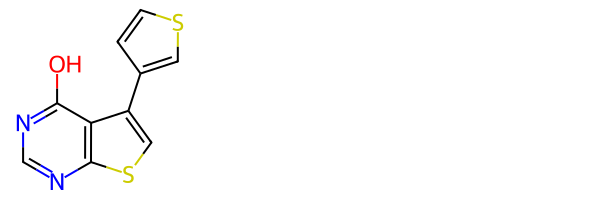

In [33]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor

IPythonConsole.ipython_useSVG=False
IPythonConsole.drawOptions.minFontSize=20

rdDepictor.SetPreferCoordGen(True)

mol_index = 9

s = df["smiles"].iloc[mol_index]

display(df.iloc[mol_index])

mol = molecules[mol_index]

mol_fig = Draw.MolsToGridImage([mol], returnPNG=False, useSVG=True)
display(mol_fig)
#with open('mol_fig.svg', 'w') as f:
#      f.write(mol_fig.data)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=1/4)

X_prop_train, X_cal, y_prop_train, y_cal = \
    train_test_split(X_train, y_train, test_size=1/3)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from crepes import WrapRegressor

rf = WrapRegressor(RandomForestRegressor(n_jobs=-1, n_estimators=500, oob_score=True))
rf.fit(X_prop_train, y_prop_train)

rf.predict(X_test)

array([2.577124  , 2.53516   , 1.93259667, ..., 2.83778   , 2.29138   ,
       2.24768286])

In [36]:
y_hat = rf.predict(X_test)

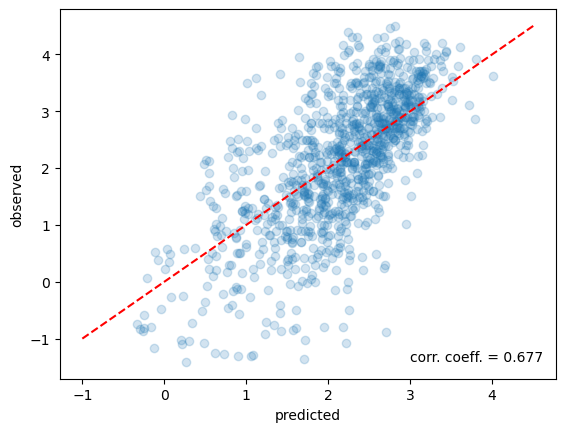

In [37]:
import matplotlib.pyplot as plt

plt.xlabel("predicted")
plt.ylabel("observed")
plt.scatter(y_hat, y_test, alpha=0.2)
plt.plot([-1,4.5], [-1,4.5], "--", c="red")
plt.text(3,-1.4,f"corr. coeff. = {np.corrcoef(y_hat, y_test)[0][1]:.3f}")
#plt.savefig("predicted_vs_observed", dpi=400)
plt.show()

In [38]:
rf.calibrate(X_cal, y_cal)
rf.predict_int(X_test, confidence=0.9)

array([[1.055664  , 4.098584  ],
       [1.0137    , 4.05662   ],
       [0.41113667, 3.45405667],
       ...,
       [1.31632   , 4.35924   ],
       [0.76992   , 3.81284   ],
       [0.72622286, 3.76914286]])

In [39]:
intervals = rf.predict_int(X_test, confidence=0.9)

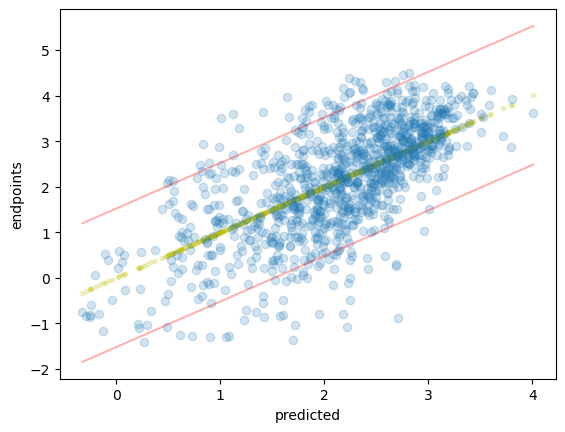

In [40]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("standard_intervals", dpi=400)
plt.show()

In [41]:
from crepes.extras import DifficultyEstimator

de_knn = DifficultyEstimator()
de_knn.fit(X=X_prop_train, 
           k=5,
           scaler=True,
           y=y_prop_train,
           beta=beta) 
de_knn.apply(X_test)

array([0.77553191, 0.6509697 , 1.16927448, ..., 0.76630351, 0.80739162,
       0.72732131])

In [42]:
difficulties = de_knn.apply(X_test)

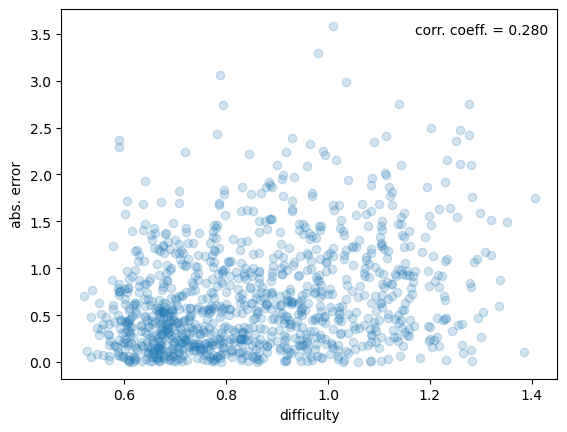

In [43]:
plt.xlabel("difficulty")
plt.ylabel("abs. error")
plt.scatter(difficulties, np.abs(y_hat-y_test), alpha=0.2)
plt.text(1.17, 3.5, f"corr. coeff. = {np.corrcoef(difficulties, np.abs(y_hat-y_test))[0][1]:.3f}")
#plt.savefig("knn_difficulties", dpi=400)
plt.show()

In [44]:
de_var = DifficultyEstimator()
de_var.fit(X=X_prop_train,
           learner=rf.learner, 
           scaler=True,
           beta=beta)
de_var.apply(X_test)

array([0.71516966, 0.60292607, 1.10478362, ..., 0.62317648, 0.87028985,
       0.70312998])

In [45]:
difficulties = de_var.apply(X_test)

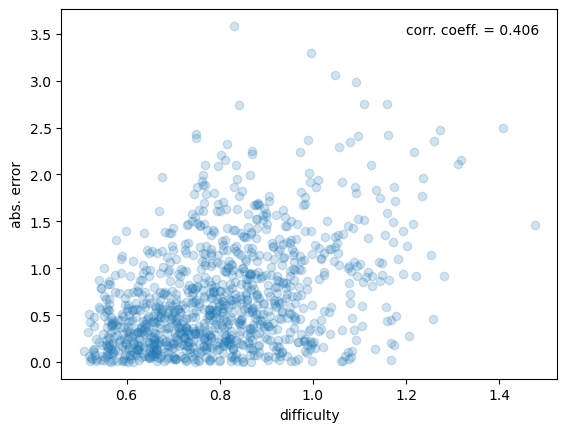

In [46]:
plt.xlabel("difficulty")
plt.ylabel("abs. error")
plt.scatter(difficulties, np.abs(y_hat-y_test), alpha=0.2)
plt.text(1.2, 3.5, f"corr. coeff. = {np.corrcoef(difficulties, np.abs(y_hat-y_test))[0][1]:.3f}")
#plt.savefig("variance_difficulties", dpi=400)
plt.show()

In [47]:
diff_y = np.abs(y_prop_train-rf.learner.oob_prediction_)
diff_model = RandomForestRegressor(n_jobs=-1, n_estimators=500)
diff_model.fit(X_prop_train, diff_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [48]:
de_mod = DifficultyEstimator()
de_mod.fit(X=X_prop_train,
           f=diff_model.predict, 
           scaler=True,
           beta=beta)
de_mod.apply(X_test)

array([0.70162953, 0.69709431, 0.87066269, ..., 0.7131525 , 0.7181743 ,
       0.71813856])

In [49]:
difficulties = de_mod.apply(X_test)

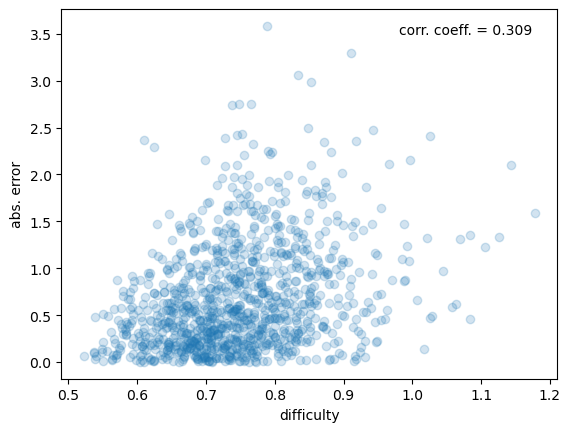

In [50]:
plt.xlabel("difficulty")
plt.ylabel("abs. error")
plt.scatter(difficulties, np.abs(y_hat-y_test), alpha=0.2)
plt.text(0.98, 3.5, f"corr. coeff. = {np.corrcoef(difficulties, np.abs(y_hat-y_test))[0][1]:.3f}")
#plt.savefig("model_difficulties", dpi=400)
plt.show()

In [51]:
rf_norm_knn = WrapRegressor(rf.learner)
rf_norm_knn.calibrate(X_cal, y_cal, de=de_knn)
rf_norm_knn.predict_int(X_test, confidence=0.9)

array([[ 1.24924043,  3.90500757],
       [ 1.42055472,  3.64976528],
       [-0.06946197,  3.93465531],
       ...,
       [ 1.52569752,  4.14986248],
       [ 0.9089455 ,  3.6738145 ],
       [ 1.00234659,  3.49301912]])

In [52]:
intervals = rf_norm_knn.predict_int(X_test, confidence=0.9)

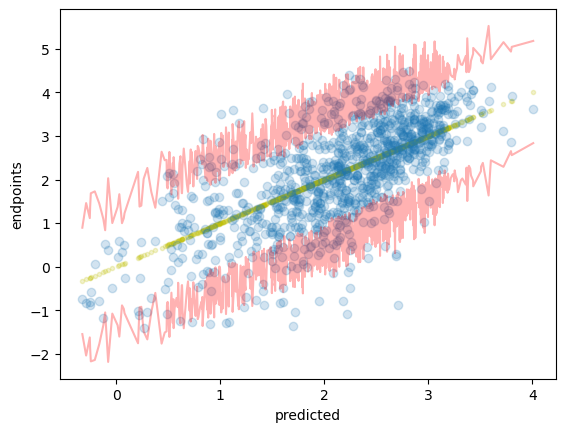

In [53]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("norm_knn_intervals", dpi=400)
plt.show()

In [54]:
rf_norm_var = WrapRegressor(rf.learner)
rf_norm_var.calibrate(X_cal, y_cal, de=de_var)
rf_norm_var.predict_int(X_test, confidence=0.9)

array([[ 1.30821966,  3.84602834],
       [ 1.46540613,  3.60491387],
       [-0.02758819,  3.89278152],
       ...,
       [ 1.73209644,  3.94346356],
       [ 0.7472505 ,  3.8355095 ],
       [ 1.00014017,  3.49522555]])

In [55]:
intervals = rf_norm_var.predict_int(X_test, confidence=0.9)

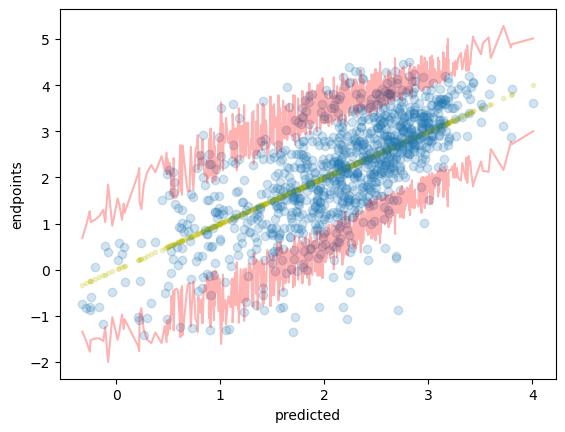

In [56]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("norm_var_intervals", dpi=400)
plt.show()

In [57]:
rf_norm_mod = WrapRegressor(rf.learner)
rf_norm_mod.calibrate(X_cal, y_cal, de=de_mod)
rf_norm_mod.predict_int(X_test, confidence=0.9)

array([[1.2070709 , 3.9471771 ],
       [1.1739627 , 3.8963573 ],
       [0.23247707, 3.63271626],
       ...,
       [1.44522631, 4.23033369],
       [0.88902037, 3.69373963],
       [0.84539301, 3.64997271]])

In [58]:
intervals = rf_norm_mod.predict_int(X_test, confidence=0.9)

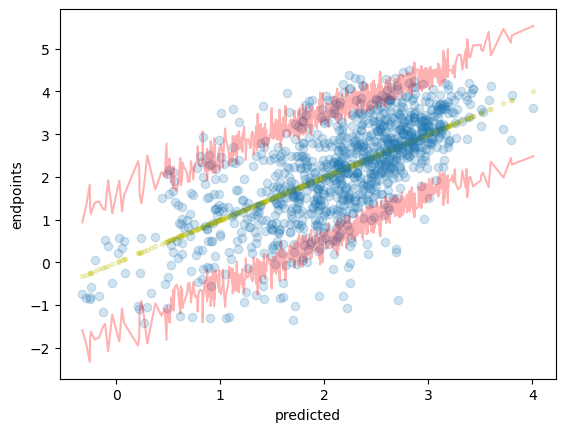

In [59]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("norm_mod_intervals", dpi=400)
plt.show()

In [60]:
confidence = 0.9
prediction_intervals = {
    "Standard":rf.predict_int(X_test, confidence=confidence),
    "Norm kNN":rf_norm_knn.predict_int(X_test, confidence=confidence),
    "Norm var":rf_norm_var.predict_int(X_test, confidence=confidence),
    "Norm mod":rf_norm_mod.predict_int(X_test, confidence=confidence),
}

In [61]:
coverages = []
mean_sizes = []
median_sizes = []

for name in prediction_intervals.keys():
    intervals = prediction_intervals[name]
    coverages.append(np.sum([1 if (y_test[i]>=intervals[i,0] and 
                                   y_test[i]<=intervals[i,1]) else 0 
                            for i in range(len(y_test))])/len(y_test))
    mean_sizes.append((intervals[:,1]-intervals[:,0]).mean())
    median_sizes.append(np.median((intervals[:,1]-intervals[:,0])))

pred_int_df = pd.DataFrame({"Coverage":coverages, 
                            "Mean size":mean_sizes, 
                            "Median size":median_sizes}, 
                           index=list(prediction_intervals.keys()))

pred_int_df.loc["Mean"] = [pred_int_df["Coverage"].mean(), 
                           pred_int_df["Mean size"].mean(),
                           pred_int_df["Median size"].mean()]

display(pred_int_df.round(4))

,Coverage,Mean size,Median size
Standard,0.9124,3.0429,3.0429
Norm kNN,0.9029,2.9326,2.8414
Norm var,0.9133,2.8422,2.7889
Norm mod,0.9076,2.9193,2.8949
Mean,0.9090,2.9342,2.8920


In [62]:
#import dataframe_image as dfi
#dfi.export(pred_int_df.round(4),"pred_int_df_05.png", dpi=400)

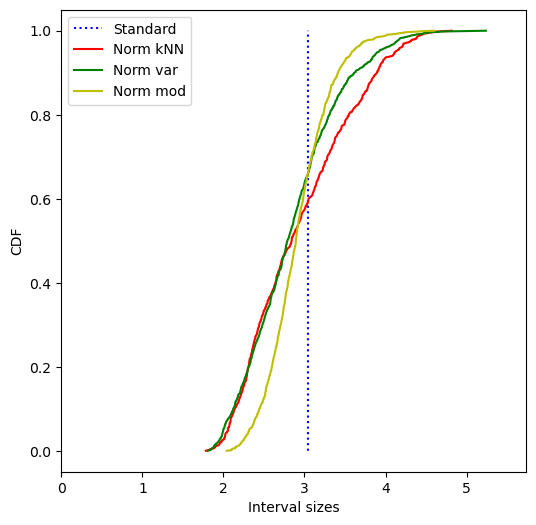

In [63]:
interval_sizes = {}
for name in prediction_intervals.keys():
    interval_sizes[name] = prediction_intervals[name][:,1] \
    - prediction_intervals[name][:,0]

plt.figure(figsize=(6,6))
plt.ylabel("CDF")
plt.xlabel("Interval sizes")
plt.xlim(0,interval_sizes["Norm var"].max() + 0.5)

colors = ["b","r","g","y","k","m","c","orange"]

for i, name in enumerate(interval_sizes.keys()):
    if "Standard" in name:
        style = "dotted"
    else:
        style = "solid"
    plt.plot(np.sort(interval_sizes[name]),
             [i/len(interval_sizes[name])
              for i in range(1,len(interval_sizes[name])+1)],
             linestyle=style, c=colors[i], label=name)

plt.legend()
#plt.savefig("prediction_interval_sizes_beta_05",dpi=400)    
plt.show()

In [64]:
from crepes.extras import MondrianCategorizer

mc_knn = MondrianCategorizer()
mc_knn.fit(X_cal, de=de_knn, no_bins=20)
rf_mond_knn = WrapRegressor(rf.learner)
rf_mond_knn.calibrate(X_cal, y_cal, mc=mc_knn)
rf_mond_knn.predict_int(X_test, confidence=0.9)

array([[ 1.072484  ,  4.081764  ],
       [ 0.90696667,  4.16335333],
       [-0.122806  ,  3.98799933],
       ...,
       [ 1.33314   ,  4.34242   ],
       [ 0.882255  ,  3.700505  ],
       [ 1.13643286,  3.35893286]])

In [65]:
intervals = rf_mond_knn.predict_int(X_test, confidence=0.9)

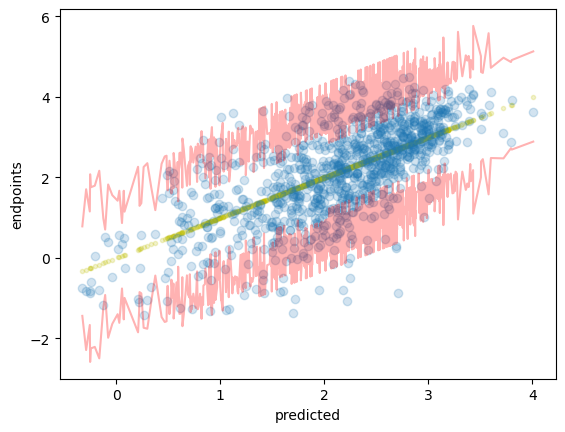

In [66]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("mond_knn_intervals", dpi=400)
plt.show()

In [67]:
mc_var = MondrianCategorizer()
mc_var.fit(X_cal, de=de_var, no_bins=20)
rf_mond_var = WrapRegressor(rf.learner)
rf_mond_var.calibrate(X_cal, y_cal, mc=mc_var)
rf_mond_var.predict_int(X_test, confidence=0.9)

array([[ 1.39245067,  3.76179733],
       [ 1.57308   ,  3.49724   ],
       [-0.216861  ,  4.08205433],
       ...,
       [ 1.8757    ,  3.79986   ],
       [ 0.07826   ,  4.5045    ],
       [ 1.06300952,  3.43235619]])

In [68]:
intervals = rf_mond_var.predict_int(X_test, confidence=0.9)

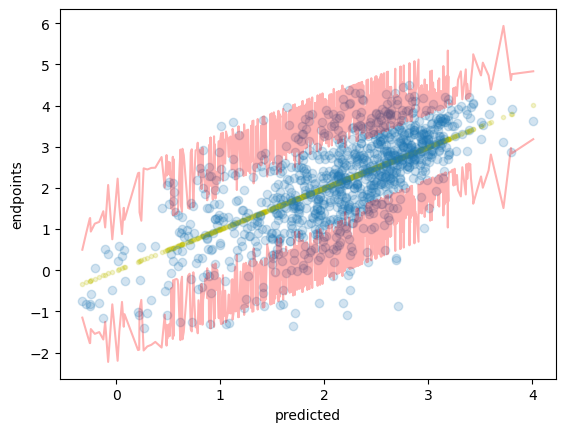

In [69]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("mond_var_intervals", dpi=400)
plt.show()

In [70]:
mc_mod = MondrianCategorizer()
mc_mod.fit(X_cal, de=de_mod, no_bins=20)

rf_mond_mod = WrapRegressor(rf.learner)
rf_mond_mod.calibrate(X_cal, y_cal, mc=mc_mod)
rf_mond_mod.predict_int(X_test, confidence=0.9)

array([[ 1.33423443,  3.82001357],
       [ 1.268441  ,  3.801879  ],
       [-0.02770333,  3.89289667],
       ...,
       [ 1.59489043,  4.08066957],
       [ 1.062876  ,  3.519884  ],
       [ 1.01917886,  3.47618686]])

In [71]:
intervals = rf_mond_mod.predict_int(X_test, confidence=0.9)

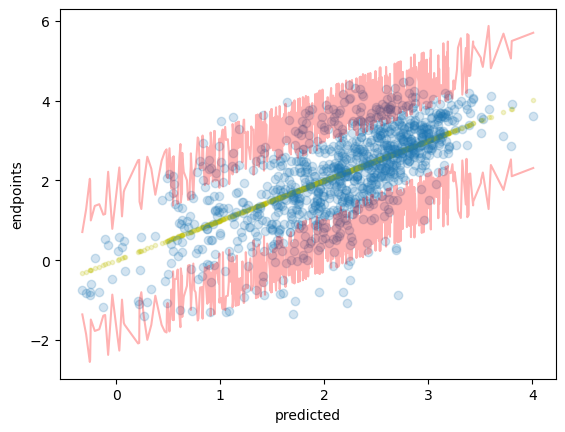

In [72]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("mond_mod_intervals", dpi=400)
plt.show()

In [73]:
confidence = 0.9
prediction_intervals = {
    "Standard":rf.predict_int(X_test, confidence=confidence),
    "Mond kNN":rf_mond_knn.predict_int(X_test, confidence=confidence),
    "Mond var":rf_mond_var.predict_int(X_test, confidence=confidence),
    "Mond mod":rf_mond_mod.predict_int(X_test, confidence=confidence),
}

In [74]:
coverages = []
mean_sizes = []
median_sizes = []

for name in prediction_intervals.keys():
    intervals = prediction_intervals[name]
    coverages.append(np.sum([1 if (y_test[i]>=intervals[i,0] and 
                                   y_test[i]<=intervals[i,1]) else 0 
                            for i in range(len(y_test))])/len(y_test))
    mean_sizes.append((intervals[:,1]-intervals[:,0]).mean())
    median_sizes.append(np.median((intervals[:,1]-intervals[:,0])))

pred_int_df = pd.DataFrame({"Coverage":coverages, 
                            "Mean size":mean_sizes, 
                            "Median size":median_sizes}, 
                           index=list(prediction_intervals.keys()))

pred_int_df.loc["Mean"] = [pred_int_df["Coverage"].mean(), 
                           pred_int_df["Mean size"].mean(),
                           pred_int_df["Median size"].mean()]

display(pred_int_df.round(4))

,Coverage,Mean size,Median size
Standard,0.9124,3.0429,3.0429
Mond kNN,0.9143,3.0984,3.1938
Mond var,0.9152,2.9508,2.8896
Mond mod,0.9152,3.0092,2.9834
Mean,0.9143,3.0253,3.0274


In [75]:
#import dataframe_image as dfi
#dfi.export(pred_int_df.round(4),"pred_int_df_mond_05.png", dpi=400)

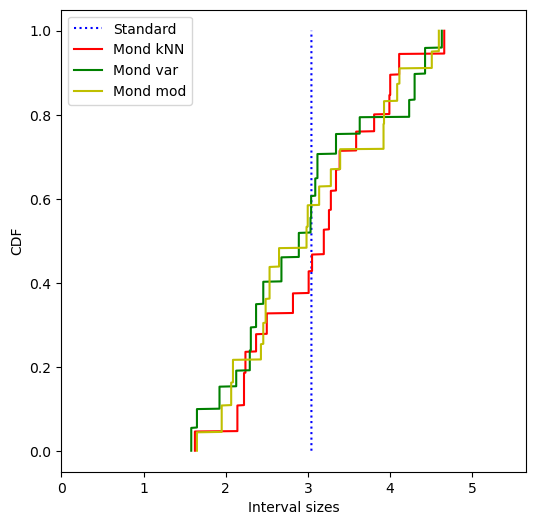

In [76]:
interval_sizes = {}
for name in prediction_intervals.keys():
    interval_sizes[name] = prediction_intervals[name][:,1] \
    - prediction_intervals[name][:,0]

plt.figure(figsize=(6,6))
plt.ylabel("CDF")
plt.xlabel("Interval sizes")
plt.xlim(0,interval_sizes["Mond kNN"].max() + 1)

colors = ["b","r","g","y","k","m","c","orange"]

for i, name in enumerate(interval_sizes.keys()):
    if "Standard" in name:
        style = "dotted"
    else:
        style = "solid"
    plt.plot(np.sort(interval_sizes[name]),
             [i/len(interval_sizes[name])
              for i in range(1,len(interval_sizes[name])+1)],
             linestyle=style, c=colors[i], label=name)

plt.legend()
#plt.savefig("prediction_interval_sizes_mond_05",dpi=400)    
plt.show()

# Conformal predictive systems

In [77]:
mc_pred = MondrianCategorizer()
mc_pred.fit(X_cal, f=rf.predict, no_bins=5)

cps_mond = WrapRegressor(rf.learner)
cps_mond.calibrate(X_cal, y_cal, mc=mc_pred, cps=True)
cps_mond.predict_int(X_test, confidence=0.9)

array([[1.061004  , 4.078218  ],
       [1.01904   , 4.036254  ],
       [0.26528429, 3.37686333],
       ...,
       [1.94199333, 3.91336   ],
       [0.59821333, 3.64894333],
       [0.55451619, 3.60524619]])

In [78]:
cps_mond.predict_int(X_test, confidence=0.9)

array([[1.061004  , 4.078218  ],
       [1.01904   , 4.036254  ],
       [0.26528429, 3.37686333],
       ...,
       [1.94199333, 3.91336   ],
       [0.59821333, 3.64894333],
       [0.55451619, 3.60524619]])

In [79]:
intervals = cps_mond.predict_int(X_test, confidence=0.9)

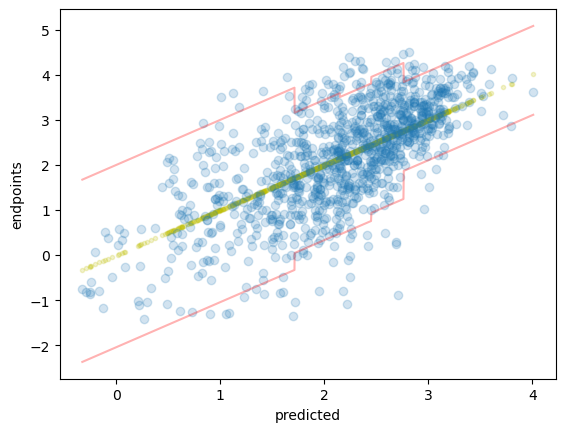

In [80]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("cps_mond_intervals", dpi=400)
plt.show()

In [81]:
cps_mond_norm = WrapRegressor(rf.learner)

# random seed can be set during calibration since v. 0.7.1

cps_mond_norm.calibrate(X_cal, y_cal, mc=mc_pred, de=de_var, cps=True, seed=123)
cps_mond_norm.predict_int(X_test, confidence=0.9)

array([[ 1.17898748,  3.79452056],
       [ 1.35645652,  3.56149008],
       [-0.199789  ,  3.77065066],
       ...,
       [ 2.0276315 ,  3.79906553],
       [ 0.10293678,  3.65459686],
       [ 0.47958222,  3.34906148]])

In [82]:
intervals = cps_mond_norm.predict_int(X_test, confidence=0.9)

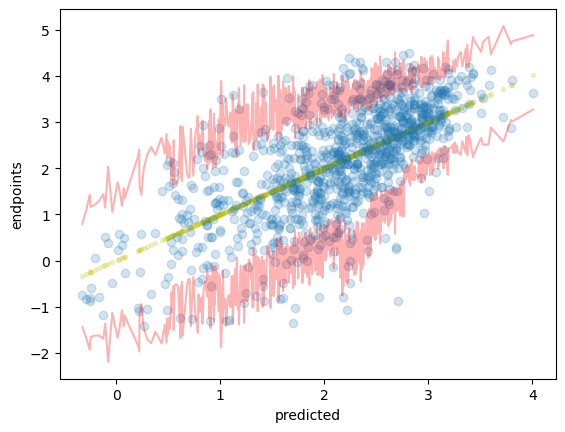

In [83]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("endpoints")
plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], intervals[index,0], c="red", alpha=0.3)
plt.plot(y_hat[index], intervals[index,1], c="red", alpha=0.3)
#plt.savefig("cps_mond_norm_intervals", dpi=400)
plt.show()

In [84]:
cps_mond_norm.predict_cps(X_test, higher_percentiles=[90,95,99])

array([[3.60066686, 3.79452056, 4.21027675],
       [3.39806109, 3.56149008, 3.91199467],
       [3.42186743, 3.77065066, 4.75918652],
       ...,
       [3.62049185, 3.79906553, 4.02949303],
       [3.29074724, 3.65459686, 4.06872574],
       [3.05509785, 3.34906148, 3.68364706]])

In [85]:
upper_bounds = cps_mond_norm.predict_cps(X_test, higher_percentiles=[90,95,99])

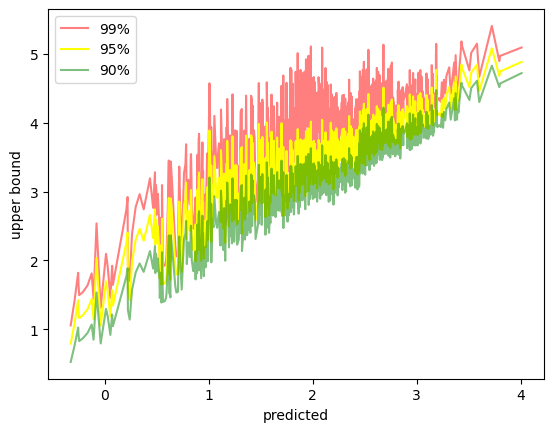

In [86]:
index = np.argsort(y_hat)

plt.xlabel("predicted")
plt.ylabel("upper bound")
#plt.scatter(y_hat, y_hat, color="y", marker=".", alpha=0.2)
#plt.scatter(y_hat[index], y_test[index], alpha=0.2)
plt.plot(y_hat[index], upper_bounds[index,2], c="red", alpha=0.5, label="99%")
plt.plot(y_hat[index], upper_bounds[index,1], c="yellow", alpha=0.99, label="95%")
plt.plot(y_hat[index], upper_bounds[index,0], c="green", alpha=0.5, label="90%")
plt.legend()
#plt.savefig("cps_upper_bounds", dpi=400)
plt.show()

In [87]:
cps_mond_norm.predict_cps(X_test, y=0)

array([8.04767150e-03, 5.69201370e-07, 6.07668892e-02, ...,
       1.62238167e-03, 3.62912091e-02, 1.82842778e-02])

In [88]:
thresholds = np.arange(-1,4,0.1)
fractions = np.zeros(len(thresholds))
proportions = np.zeros(len(thresholds))
for i,t in enumerate(thresholds):
    p_values = cps_mond_norm.predict_cps(X_test, y=t)
    fractions[i] = np.sum(p_values < 0.05)/ len(y_test)
    proportions[i] = np.sum(y_test <= t)/ len(y_test)

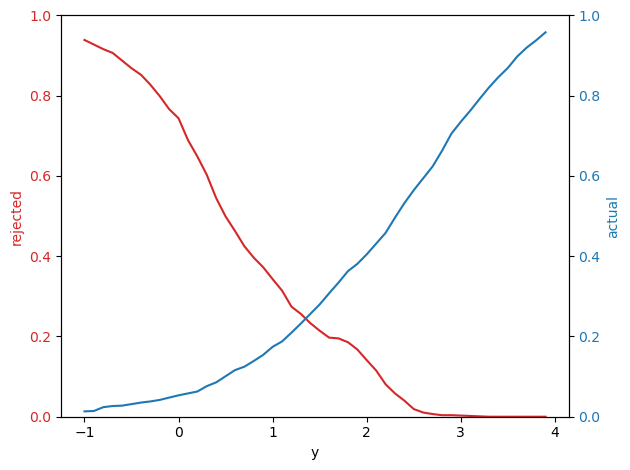

In [89]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('y')
ax1.set_ylabel('rejected', color=color)
ax1.plot(thresholds, fractions, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,1])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('actual', color=color)  # we already handled the x-label with ax1
ax2.plot(thresholds, proportions, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,1])
#plt.grid(which="major", axis="both")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("rejected_vs_actual", dpi=400)
plt.show()

In [90]:
# since a seed was provided during calibration, the following is now deterministic:

cps_mond_norm.predict_cps(X_test, y=y_test)

array([0.60046473, 0.7962091 , 0.38304177, ..., 0.49925271, 0.23534334,
       0.66283404])

In [91]:
cps_mond_norm.evaluate(X_test, y_test, confidence=0.95)

{'error': 0.043809523809523854,
 'eff_mean': 3.4621543905237577,
 'eff_med': 3.374301790920067,
 'CRPS': 0.47131668972504487,
 'time_fit': 0.00024199485778808594,
 'time_evaluate': 0.022746562957763672}

In [92]:
cpds = cps_mond_norm.predict_cps(X_test, return_cpds=True)

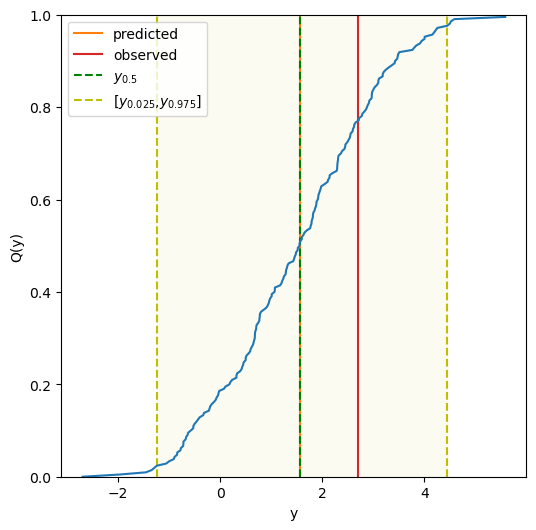

In [93]:
test_index = np.random.randint(len(X_test)) # A test object is randomly selected
cpd = cpds[test_index]

p = np.array([i/len(cpd) for i in range(len(cpd))])

lower_index = np.where(p<=0.025)[0][-1]
mid_index = np.where(p>=0.50)[0][0]
upper_index = np.where(p>=0.975)[0][0]

low_percentile = cpd[lower_index]
median = cpd[mid_index]
high_percentile = cpd[upper_index]

plt.figure(figsize=(6,6))

y_hat = rf.predict(X_test[test_index][None,:])

plt.plot([y_hat,y_hat],[0,1], color="tab:orange")
plt.plot([y_test[test_index],y_test[test_index]],[0,1], color="tab:red")
plt.xlabel("y")
plt.ylabel("Q(y)")
plt.ylim(0,1)

plt.plot([median,median],[0,1],"g--")
plt.plot([low_percentile,low_percentile],[0,1],"y--")
plt.legend(["predicted","observed","$y_{0.5}$","[$y_{0.025}$,$y_{0.975}$]"])
plt.plot([high_percentile,high_percentile],[0,1],"y--")
plt.plot(cpd,p, color="tab:blue")
rectangle = plt.Rectangle((low_percentile,0),
                          abs(high_percentile-low_percentile),1, color="y", 
                          alpha=0.05)
plt.gca().add_patch(rectangle)
#plt.savefig("cpd",dpi=400)    
plt.show()